In [21]:
import pandas as pd
import numpy as np
import os
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
np.random.seed(100)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
path = './Financial_Risk_Participants_Data/Financial_Risk_Participants_Data/'
files = os.listdir(path)
filename = files[-1]

train_df = pd.read_csv(path+filename)

In [43]:
classifiers = [LogisticRegression(random_state=100),RandomForestClassifier(random_state=100),GaussianNB(),AdaBoostClassifier(random_state=100),SVC(random_state=100)]
var = ['Location_Score','Internal_Audit_Score','External_Audit_Score','Fin_Score']
names = ['LogisticRegression','Random Forest','Naive Bayes','Adaptive Boosting','SVC']
for j,i in zip(names,classifiers):
    trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
    print('-'*10+j+'-'*10+'\n')
    clf = i.fit(trainX,trainy)
    predicted = clf.predict(testX)
    print(classification_report(testy, predicted, target_names=['0','1']))
    print('\n')

----------LogisticRegression----------

              precision    recall  f1-score   support

           0       0.74      0.77      0.76       101
           1       0.86      0.84      0.85       171

    accuracy                           0.82       272
   macro avg       0.80      0.81      0.80       272
weighted avg       0.82      0.82      0.82       272



----------Random Forest----------

              precision    recall  f1-score   support

           0       0.72      0.92      0.81       101
           1       0.94      0.79      0.86       171

    accuracy                           0.84       272
   macro avg       0.83      0.86      0.83       272
weighted avg       0.86      0.84      0.84       272



----------Naive Bayes----------

              precision    recall  f1-score   support

           0       0.69      0.96      0.80       101
           1       0.97      0.75      0.84       171

    accuracy                           0.83       272
   macro avg    

----------LogisticRegression----------

IsUnderRisk    0    1
row_0                
0            111   36
1             52  236

Precision: 0.8194444444444444
Recall: 0.8676470588235294
F1-Score: 0.8428571428571429
Accuracy: 0.7977011494252874


----------Random Forest----------

IsUnderRisk    0    1
row_0                
0            152   63
1             11  209

Precision: 0.95
Recall: 0.7683823529411765
F1-Score: 0.8495934959349595
Accuracy: 0.8298850574712644


----------Naive Bayes----------

IsUnderRisk    0    1
row_0                
0            154   65
1              9  207

Precision: 0.9583333333333334
Recall: 0.7610294117647058
F1-Score: 0.848360655737705
Accuracy: 0.8298850574712644


----------Adaptive Boosting----------

IsUnderRisk    0    1
row_0                
0            140   58
1             23  214

Precision: 0.9029535864978903
Recall: 0.7867647058823529
F1-Score: 0.8408644400785854
Accuracy: 0.8137931034482758


----------SVC----------

IsUnderRisk    0   

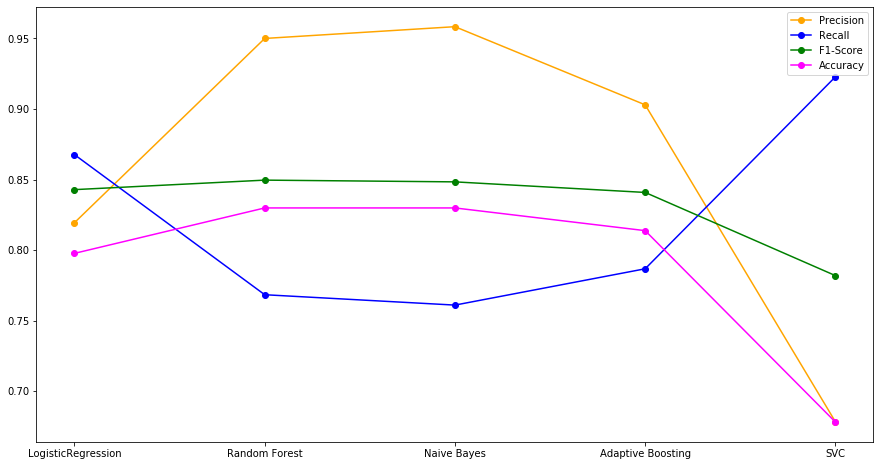

In [113]:
classifiers = [LogisticRegression(random_state=100),RandomForestClassifier(random_state=100),GaussianNB(),AdaBoostClassifier(random_state=100),SVC(random_state=100)] #,SVC(random_state=100)
var = ['Location_Score','Internal_Audit_Score','External_Audit_Score','Fin_Score']
names = ['LogisticRegression','Random Forest','Naive Bayes','Adaptive Boosting','SVC'] #
metric_df = pd.DataFrame(columns=['Name','Precision','Recall','F1-Score'])

for j,i in zip(names,classifiers):
    trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.8, random_state=2)
    print('-'*10+j+'-'*10+'\n')
    clf = i.fit(trainX,trainy)
    predicted = clf.predict(testX)
    conf_df = pd.DataFrame(pd.crosstab(predicted,testy))
    
    tp = conf_df.iloc[1][1]
    tn = conf_df.iloc[0][0]
    fp = conf_df.iloc[1][0]
    fn = conf_df.iloc[0][1]
    
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1 = 2*((precision*recall)/(precision+recall))
    accuracy = (tp+tn)/(tp+fp+tn+fn)
    
    print(conf_df)
    print('\nPrecision: {}\nRecall: {}\nF1-Score: {}\nAccuracy: {}'.format(precision,recall,f1,accuracy))
    print('\n')
    
    temp = pd.DataFrame({'Name':[j],'Precision':[precision],'Recall':[recall],'F1-Score': [f1], 'Accuracy':[accuracy]})
    metric_df = pd.concat([metric_df,temp])
    
metric_df.reset_index(drop=True,inplace=True)

fig = plt.figure(figsize=(15,8))
plt.plot(metric_df['Name'],metric_df['Precision'],color='orange',marker='o')
plt.plot(metric_df['Name'],metric_df['Recall'],color='blue',marker='o')
plt.plot(metric_df['Name'],metric_df['F1-Score'],color='green',marker='o')
plt.plot(metric_df['Name'],metric_df['Accuracy'],color='magenta',marker='o')
plt.legend(['Precision','Recall','F1-Score','Accuracy'])
plt.show()

----------LogisticRegression----------

No Skill: ROC AUC=0.500
LogisticRegression: ROC AUC=0.895
----------Random Forest----------

No Skill: ROC AUC=0.500
Random Forest: ROC AUC=0.901
----------Naive Bayes----------

No Skill: ROC AUC=0.500
Naive Bayes: ROC AUC=0.917
----------Adaptive Boosting----------

No Skill: ROC AUC=0.500
Adaptive Boosting: ROC AUC=0.909
----------SVC----------

No Skill: ROC AUC=0.500
SVC: ROC AUC=0.786


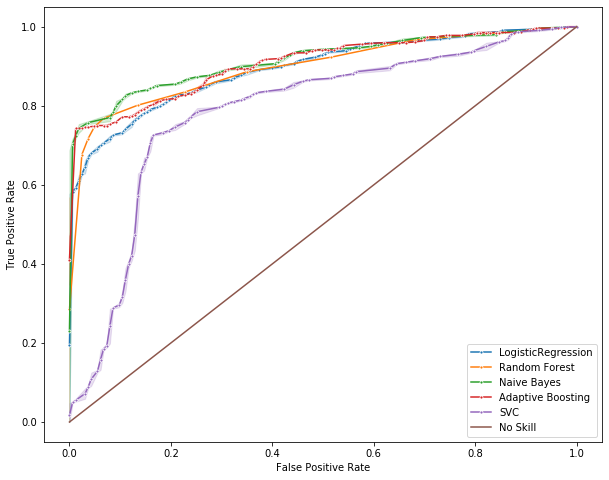

In [80]:
classifiers = [LogisticRegression(random_state=100),RandomForestClassifier(random_state=100),GaussianNB(),AdaBoostClassifier(random_state=100),SVC(probability=True, random_state=100)]
var = ['Location_Score','Internal_Audit_Score','External_Audit_Score','Fin_Score']
X = train_df[var]
y = train_df['IsUnderRisk']


fig,ax = plt.subplots(1,1,figsize=(10,8))
names = ['LogisticRegression','Random Forest','Naive Bayes','Adaptive Boosting','SVC']
for j,i in zip(names,classifiers):
    trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.8, random_state=2)
    print('-'*10+j+'-'*10+'\n')
    ns_probs = [0 for _ in range(len(testy))]
    clf = i.fit(trainX,trainy)
    lr_probs = clf.predict_proba(testX)
    lr_probs = lr_probs[:, 1]
    ns_auc = roc_auc_score(testy, ns_probs)
    lr_auc = roc_auc_score(testy, lr_probs)
    print('No Skill: ROC AUC=%.3f' % (ns_auc))
    print(j+': ROC AUC=%.3f' % (lr_auc))
    ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
    
    sns.lineplot(lr_fpr, lr_tpr, marker='.', label=j,ax=ax)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
sns.lineplot(ns_fpr, ns_tpr, linestyle='--', label='No Skill',ax=ax)
plt.legend()
plt.show()